In [ ]:
## 라이브러리 설치 
!pip install matplotlib

In [ ]:
## 라이브러리 로드 
import matplotlib.pyplot as plt
# from matplotlib import pyplot

In [ ]:
## 라인 그래프 
# plot({1차원 데이터형태})
# plot 1차원 데이터 인자의 개수가 1개 
#   - y축 데이터로 대입 
#   - x축은 0부터 1씩 증가하는 데이터 생성
# 인자의 개수가 2개인 경우 
#   - 첫번째 인자가 x축 데이터 
#   - 두번째 인자가 y축 데이터 
data = [5, 3, 7, 1]

plt.plot(data)
plt.show()

In [ ]:
## 2개의 그래프를 출력 
plt.plot(data)
plt.plot([10, 2, 4, 7])
plt.show()

In [ ]:
plt.plot([1,3,5,7], data)
plt.show()

In [ ]:
# 라인 그래프에서 라인의 색을 변경 
plt.plot(data, "#FF0066")
plt.show()

In [ ]:
# 선의 종류를 변경 
plt.plot(data, "--r")
plt.show()

In [ ]:
## x, y에 라벨 설정 
## 그래프의 제목 설정 
plt.plot(data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Graph')
plt.show()

In [ ]:
# 막대 그래프 
# bar({x축 데이터}, {y축 데이터})
x = [1,2,3,4]
y = [80, 90, 70, 80]

plt.bar(x, y)
plt.show()

In [ ]:
# 에러 발생 (인자의 개수가 2개는 필수 항목)
plt.bar(y)
plt.show()

In [ ]:
# 막대의 색상 변경 
plt.bar(x, y, color=['red', 'yellow', 'green'])
plt.show()

In [ ]:
# 막대의 너비 변경
plt.bar(x, y, width=0.4)
plt.show()

In [ ]:
plt.bar(['A', 'B', 'C', 'D'], y)
plt.show()

In [24]:
## 그래프에서 한글 깨짐 방지 
import platform

In [25]:
platform.system()

'Windows'

In [26]:
## 만약에 OS가 MAC 인 경우 
if platform.system() == 'Darwin':
    plt.rc('font', family = 'AppleGothic')
else:
    plt.rc('font', family = 'Malgun Gothic')

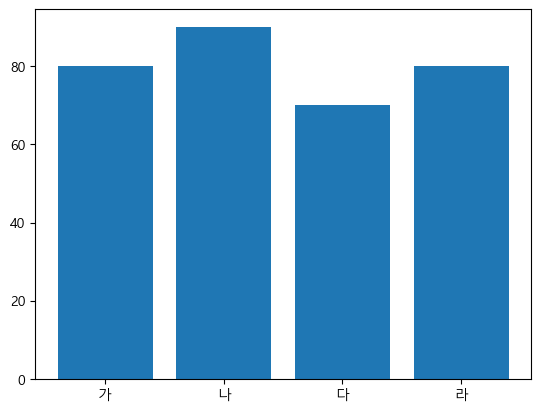

In [27]:
plt.bar( ['가', '나', '다', '라'], y )
plt.show()

In [ ]:
# 누운 막대 그래프 
plt.barh(x, y)
plt.show()

In [29]:
import numpy as np

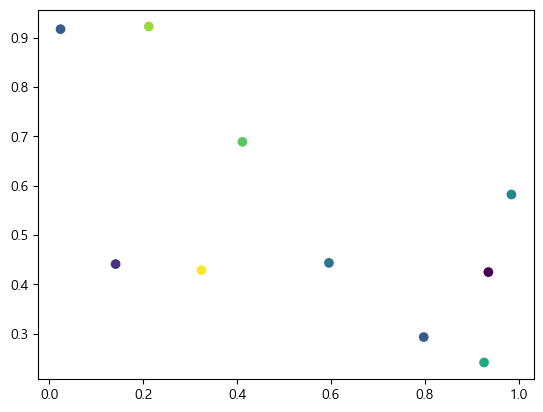

In [34]:
x = np.random.random(10)
y = np.random.random(10)

color = np.random.random(10)

plt.scatter(x, y,  c=color)
plt.show()

In [ ]:
## seaborn 라이브러리 설치 
!pip install seaborn

In [36]:
import seaborn as sns
import pandas as pd

In [37]:
## csv 폴더 안에 있는 drinks.csv 로드 
drinks = pd.read_csv("../../csv/drinks.csv")

In [38]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [ ]:
## 데이터에서 상관계수를 출력 
## 데이터프레임 안에 내장된 corr()함수 사용 
corr = drinks.iloc[:, 1:5].corr(method='pearson')
corr

In [40]:
corr.values

array([[1.        , 0.45881887, 0.52717169, 0.83583863],
       [0.45881887, 1.        , 0.19479705, 0.65496818],
       [0.52717169, 0.19479705, 1.        , 0.66759834],
       [0.83583863, 0.65496818, 0.66759834, 1.        ]])

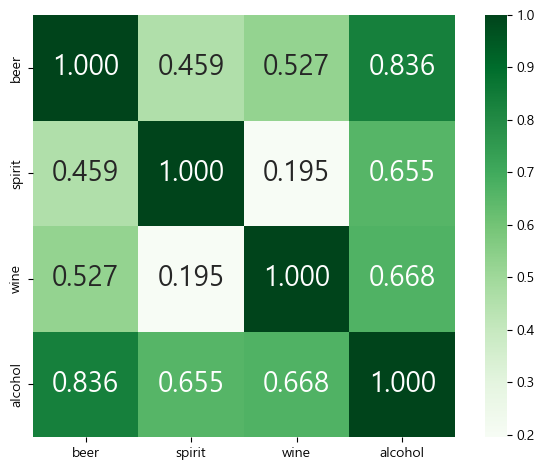

In [49]:
## 히트맵 출력 
cols_view = ['beer', 'spirit', 'wine', 'alcohol']

hm = sns.heatmap(
    corr.values, 
    cbar=True,   # 사이드바 유무
    annot= True, # 히트맵에 숫자 표시 유무
    square= True, # 히트맵을 정사각형 표시 유무
    fmt = '.3f', # 숫자의 소수점 자리수 
    annot_kws= {'size' : 20}, # 숫자의 크기 
    xticklabels= cols_view, 
    yticklabels= cols_view, 
    cmap= 'Greens'
)
plt.tight_layout()
plt.show()

c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\moons\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

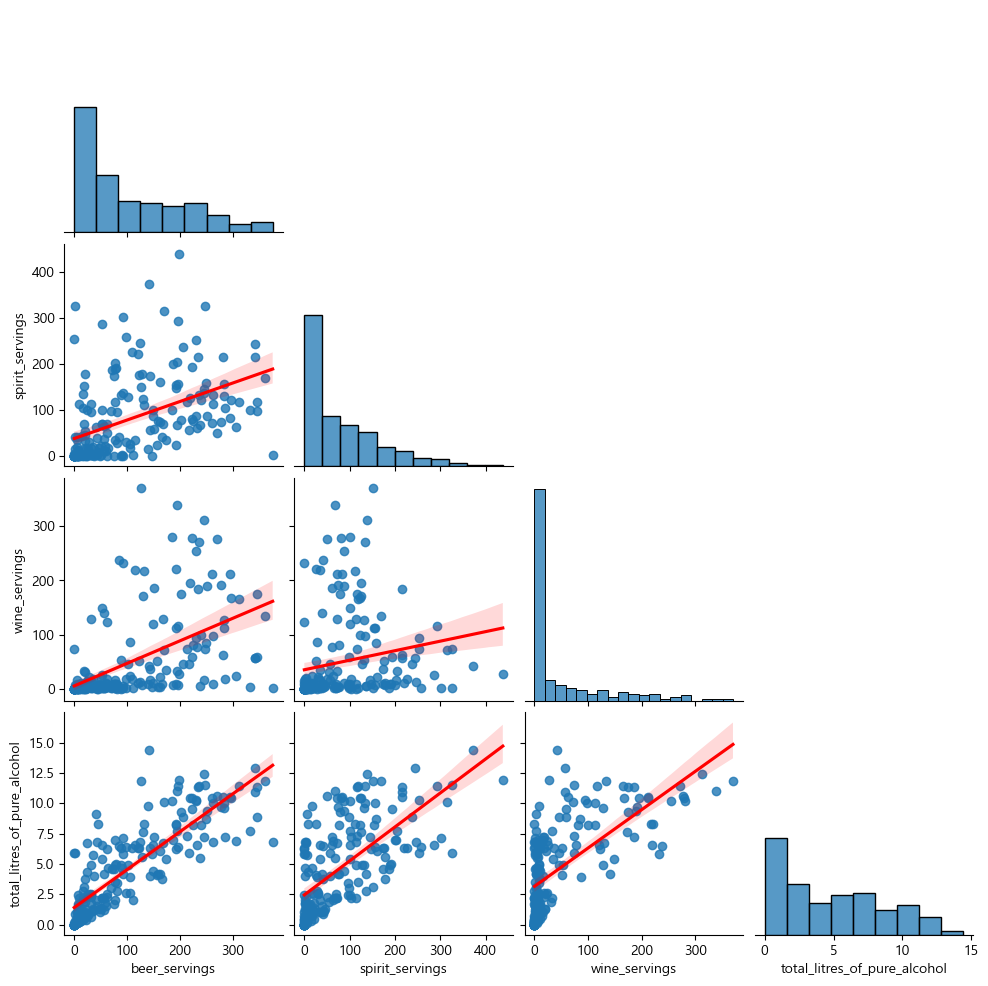

In [45]:
## 데이터의 분포도를 시각화
sns.pairplot(
    drinks.loc[:, 'beer_servings' : 'total_litres_of_pure_alcohol'], 
    height = 2.5, 
    corner= True, 
    kind = 'reg', 
    plot_kws= {
        'line_kws' : {
            'color' : 'red'
        }
    }
)
plt.show()